<a href="https://colab.research.google.com/github/abhijeetrajhansgithub/GoogleColab/blob/main/Neural_Network_Regression_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.



In [107]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

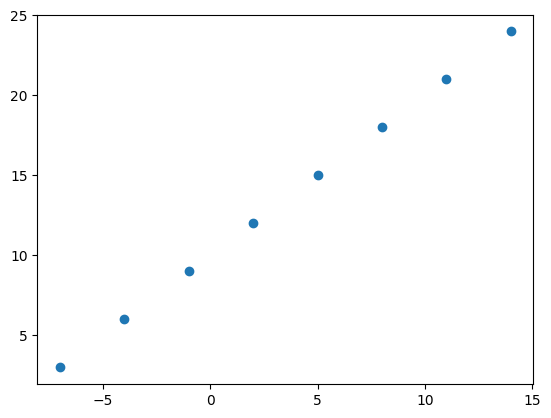

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [109]:
X + 10, y == X + 10

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ True,  True,  True,  True,  True,  True,  True,  True]))

In [110]:
X.shape, y.shape

((8,), (8,))

In [111]:
X[0], y[0]

(-7.0, 3.0)

In [112]:
X[0].shape, y[0].shape

((), ())

In [113]:
X[0].ndim, y[0].ndim

(0, 0)

# Input and Output shapes



In [114]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [115]:
# Turn our numpy arrays to tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [116]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [117]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

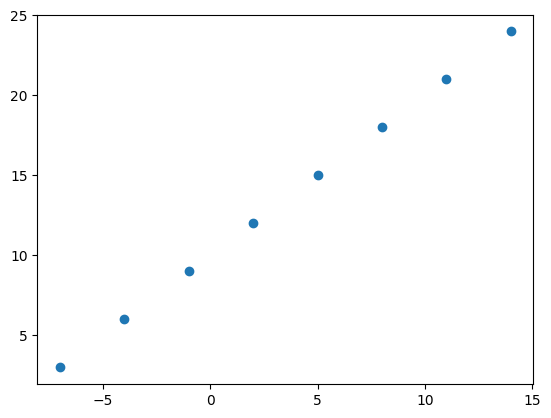

In [118]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model** - define the ***loss function*** (a function that tells out model how wrong it is) and the ***optimizer*** (tells our model how to improve the patterns its learning) and ***evaluation metrics*** (what we can use to interpret the performance of our model)

3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [119]:
# Set the random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,  # MAE - mean absolute error
              optimizer=tf.keras.optimizers.SGD(),  # SGD - stochastic gradient descent
              metrics=["mae"]
              )


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=37)

Epoch 1/37
1/1 [==============================] - 1s 835ms/step - loss: 12.7853 - mae: 12.7853
Epoch 2/37
1/1 [==============================] - 0s 20ms/step - loss: 12.6528 - mae: 12.6528
Epoch 3/37
1/1 [==============================] - 0s 18ms/step - loss: 12.5203 - mae: 12.5203
Epoch 4/37
1/1 [==============================] - 0s 12ms/step - loss: 12.3878 - mae: 12.3878
Epoch 5/37
1/1 [==============================] - 0s 17ms/step - loss: 12.2553 - mae: 12.2553
Epoch 6/37
1/1 [==============================] - 0s 12ms/step - loss: 12.1228 - mae: 12.1228
Epoch 7/37
1/1 [==============================] - 0s 19ms/step - loss: 11.9903 - mae: 11.9903
Epoch 8/37
1/1 [==============================] - 0s 15ms/step - loss: 11.8578 - mae: 11.8578
Epoch 9/37
1/1 [==============================] - 0s 14ms/step - loss: 11.7253 - mae: 11.7253
Epoch 10/37
1/1 [==============================] - 0s 9ms/step - loss: 11.5928 - mae: 11.5928
Epoch 11/37
1/1 [==============================] - 0s 9ms/s

In [120]:
X, tf.expand_dims(X, axis=-1)

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>)

In [121]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [122]:
# Try and make a prediction usinf the model

y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 243ms/step


array([[25.856228]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we migh add more layers, increase the number of hidden layers, change the activation function of each layer

2. **Compiling the model** - here we might change the optimization function or perhaps the ***learning rate*** of the optimization function

3. **Fitting a model** - here we might fit a model for more ***epochs***.

In [123]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 976ms/step - loss: 13.9334 - mae: 13.9334
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.8009 - mae: 13.8009
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 13.6684 - mae: 13.6684
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.5359 - mae: 13.5359
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4034 - mae: 13.4034
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 13.2709 - mae: 13.2709
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 13.1384 - mae: 13.1384
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 13.0059 - mae: 13.0059
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 12.8734 - mae: 12.8734
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 12.7409 - mae: 12.7409
Epoch 11/100
1/1 [==============================

In [124]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [125]:
model.predict([17.0])

1/1 [==============================] - 0s 231ms/step


array([[29.714804]], dtype=float32)

In [126]:
# Try: 2

# Create a model

model = tf.keras.Sequential (
    [
        tf.keras.layers.Dense(200, activation="relu"),
        # tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)
    ]
)

# Compilr the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics= ["mae"]
)

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 12.9358 - mae: 12.9358
Epoch 2/200
1/1 [==============================] - 0s 33ms/step - loss: 11.6941 - mae: 11.6941
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 10.4924 - mae: 10.4924
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 9.5316 - mae: 9.5316
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 8.5378 - mae: 8.5378
Epoch 6/200
1/1 [==============================] - 0s 14ms/step - loss: 7.5072 - mae: 7.5072
Epoch 7/200
1/1 [==============================] - 0s 19ms/step - loss: 6.4368 - mae: 6.4368
Epoch 8/200
1/1 [==============================] - 0s 19ms/step - loss: 5.3194 - mae: 5.3194
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 4.1400 - mae: 4.1400
Epoch 10/200
1/1 [==============================] - 0s 22ms/step - loss: 3.7888 - mae: 3.7888
Epoch 11/200
1/1 [==============================] - 0s 22ms/step 

In [127]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [128]:
model.predict([17.0]), model.predict([20.0])

1/1 [==============================] - 0s 126ms/step


(array([[27.136707]], dtype=float32), array([[30.184933]], dtype=float32))

## Evaluating a model

In practice, a typical workflow we'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ... and so on.
```

When it comes to evaluation... there are three words to remember:
``` visualize, visualize, visualize```

In [129]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [130]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

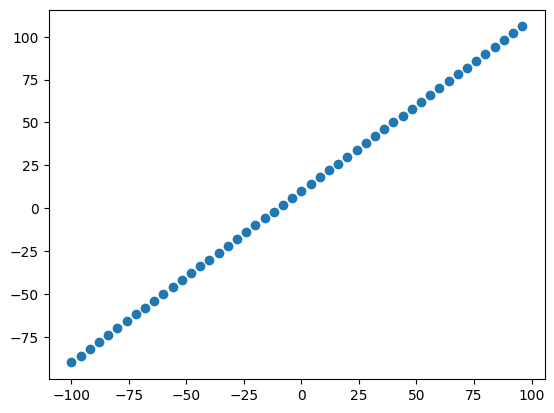

In [131]:
plt.scatter(X, y)

## **Split the data on three sets**

* Training set - the model learns from this data, which is typically 70-80% of the total data available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available
* Test set - the model gets evaluated on this data, which is typically 10-15% of the total data available



In [132]:
# Split the dataset

len(X), len(y)

(50, 50)

In [133]:
# Split the data into train and test sets

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing Data

Now that we have out training and test datasets, let's visualize them

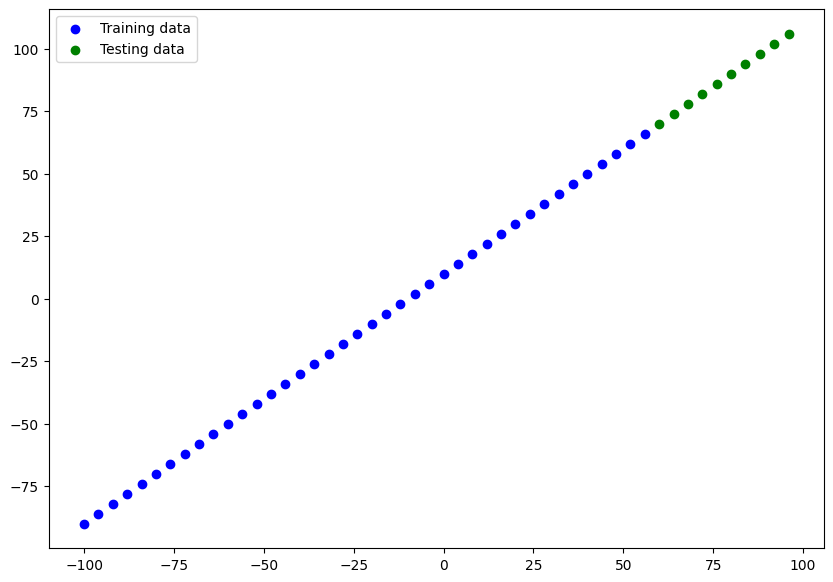

In [134]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")

# PLot test data in green
plt.scatter(X_test, y_test, c="green", label="Testing data")

# Show the legend
plt.legend()

In [135]:
X_train, y_train, tf.expand_dims(X_train, axis=-1)

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
    

In [136]:
# Let's have a look how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 26.5845 - mae: 26.5845
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 23.6875 - mae: 23.6875
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 21.0843 - mae: 21.0843
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 18.8286 - mae: 18.8286
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 17.0378 - mae: 17.0378
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 15.6833 - mae: 15.6833
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 14.5072 - mae: 14.5072
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 13.3015 - mae: 13.3015
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2145 - mae: 12.2145
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4518 - mae: 11.4518
Epoch 11/100
2/2 [==============================] -

## Visualizing the model

In [137]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
# Let's build a model that builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [139]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in the already learned patterns or parameters from other models during transfer learning)

In [140]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 42.4202 - mae: 42.4202
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 39.1449 - mae: 39.1449
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 35.8554 - mae: 35.8554
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 32.7694 - mae: 32.7694
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8609 - mae: 29.8609
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2309 - mae: 27.2309
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 24.7137 - mae: 24.7137
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 22.0842 - mae: 22.0842
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.2864 - mae: 19.2864
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 17.0732 - mae: 17.0732
Epoch 11/100
2/2 [==============================] - 0s 7ms

In [141]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


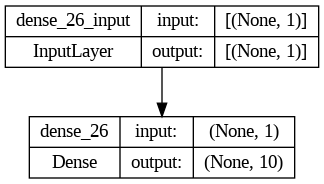

In [142]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

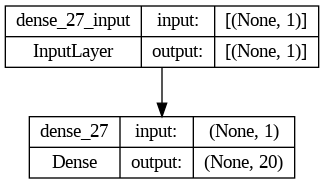

In [143]:
# Let's build a model that builds automatically by defining the input_shape argument

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


# 4. Visualize the model
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

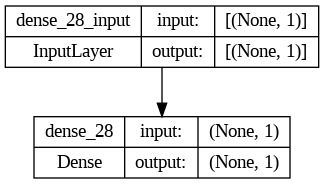

In [144]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

# Visualize the model
plot_model(model=model, show_shapes=True)

In [145]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
X_test.shape, y_test.shape

(TensorShape([10]), TensorShape([10]))

In [147]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

i.e. `y_test` versus `y_pred`

In [148]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[44.48561 ],
       [47.36286 ],
       [50.240112],
       [53.11736 ],
       [55.99461 ],
       [58.871857],
       [61.749107],
       [64.62636 ],
       [67.50361 ],
       [70.38086 ]], dtype=float32)

In [149]:
y_pred.shape

(10, 1)

In [150]:
X_test.shape == y_pred.shape

False

In [151]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

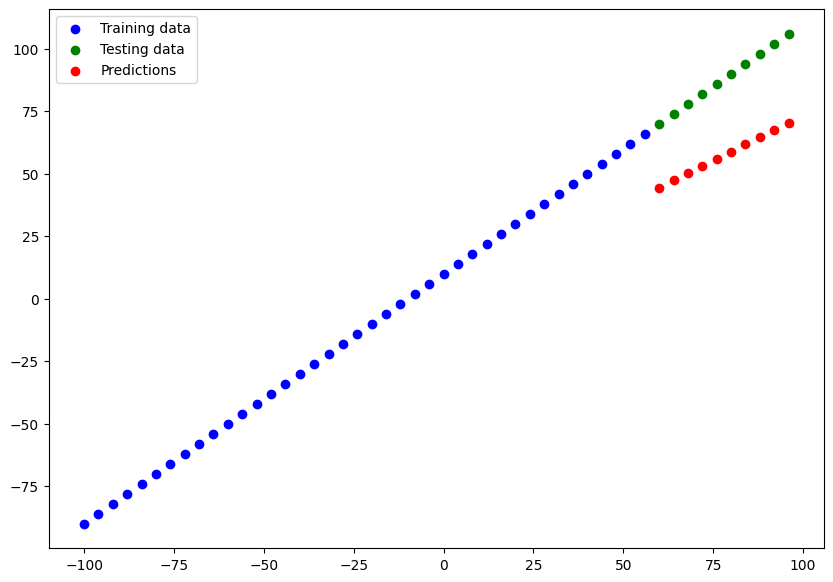

In [152]:
# Plotting function

def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=y_pred
        ):

    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", label="Training data")
    plt.scatter(test_data, test_labels, c="green", label="Testing data")
    plt.scatter(test_data, predictions, c="red", label="Predictions")

    plt.legend()


plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)


### Evaluation Metrics

Evaluating the model's predictions with regression evaluation metrics.

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, **"on average, how wrong is each of my model's predictions."**

* MSE - mean square error, **"square the average errors."**

In [153]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 106ms/step - loss: 30.5668 - mae: 30.5668


[30.5667667388916, 30.5667667388916]

In [154]:
# Calculate the mean ansolute error

values = tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred).numpy()
values.mean()

30.574383

In [155]:
Y = tf.expand_dims(y_test, axis=-1)

In [156]:
y_pred - Y

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[-26],
       [-27],
       [-28],
       [-29],
       [-31],
       [-32],
       [-33],
       [-34],
       [-35],
       [-36]], dtype=int32)>

In [157]:
l = []

for i in (y_pred - Y):
    l.append(abs(i).numpy())

l
print(sum(l) / len(l))

[31.1]


In [158]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[44.48561 ],
       [47.36286 ],
       [50.240112],
       [53.11736 ],
       [55.99461 ],
       [58.871857],
       [61.749107],
       [64.62636 ],
       [67.50361 ],
       [70.38086 ]], dtype=float32)>

In [159]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44.48561 , 47.36286 , 50.240112, 53.11736 , 55.99461 , 58.871857,
       61.749107, 64.62636 , 67.50361 , 70.38086 ], dtype=float32)>

In [160]:
# Calculate the MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.566767>

In [161]:
# Calculatethe mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=944.72687>

In [162]:
# Functions to reuse MAE anbd MSE

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Improving our model with experiments

1. Get more data
2. Make your model larger
3. Train for longer

Let's do three modelling experiments:

1. `model_1` - same as the original, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### Build `model_1`

In [163]:
# Set random seed
tf.random.set_seed(42)

# 1. Create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 40ms/step


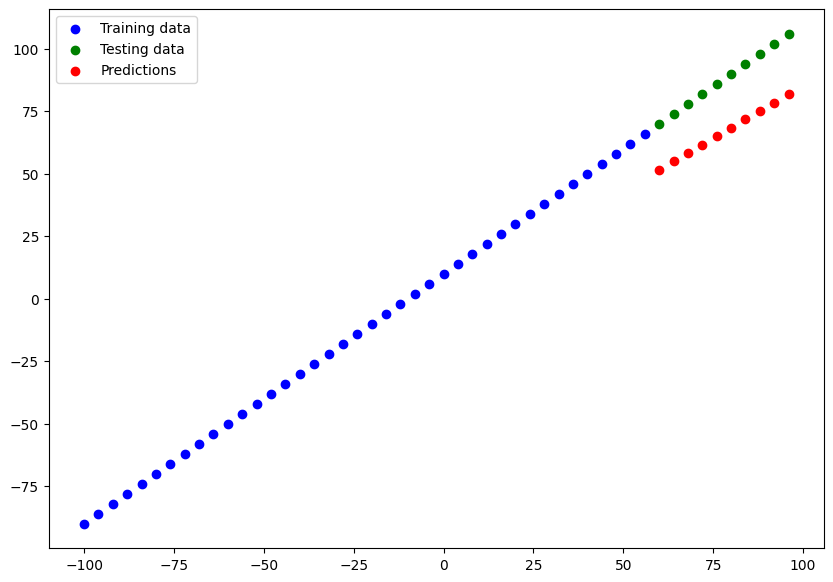

In [164]:
# Make and plot predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [165]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1).numpy()
mse_1 = mse(y_test, y_pred_1).numpy()
mae_1 , mse_1

(21.256775, 455.27887)

###Build `model_2`

In [166]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 73ms/step


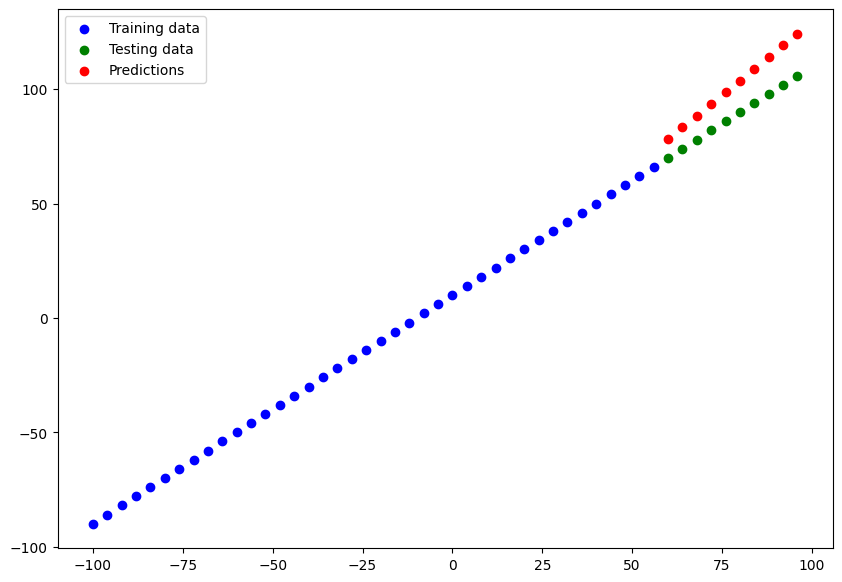

In [167]:

# Make and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [168]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2).numpy()
mse_2 = mse(y_test, y_pred_2).numpy()
mae_2 , mse_2

(13.269376, 186.21732)

### Build `model_3`

In [169]:
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [170]:
# Plot the model
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 52ms/step


array([[16.588863],
       [17.391813],
       [18.194761],
       [18.997711],
       [19.80066 ],
       [20.60361 ],
       [21.406557],
       [22.209505],
       [23.012455],
       [23.815403]], dtype=float32)

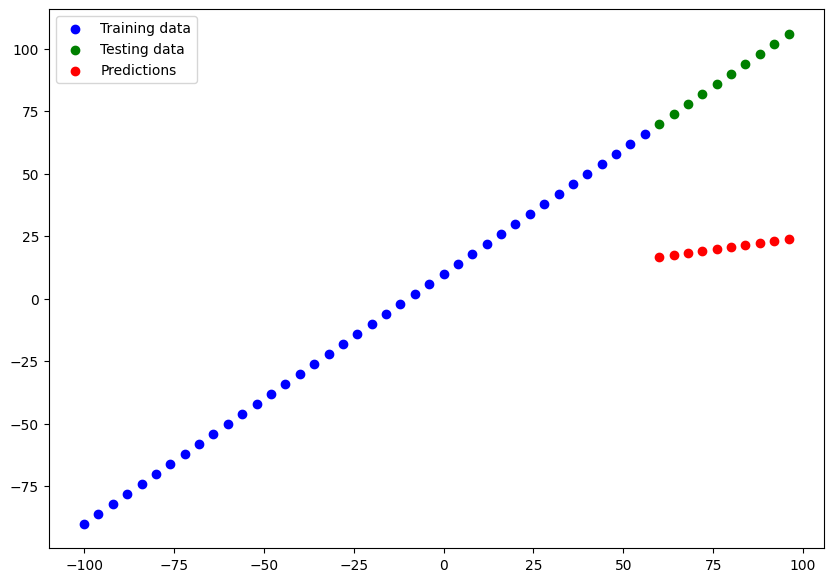

In [171]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_3)

In [172]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test, y_pred_3.squeeze()).numpy()
mae_3, mse_3

(67.79787, 4680.875)

## Comparing the results of our experiments

In [173]:
tf.__version__

'2.15.0'

In [174]:
# Let's compare out model's results using the pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.256775,455.278870
1,model_2,13.269376,186.217316
2,model_3,67.797867,4680.875000


 ## Saving our models

 There are two main formats we can save our models:

 1. The SavedModel format
 2. The HDF5 format

In [175]:
model_1.save("best_model_saved_model_format")

In [176]:
# Save model using thHDF5 format

model_1.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in the saved model

In [177]:
# Load the model

loaded_saved_model = tf.keras.models.load_model("best_model_saved_model_format")
loaded_saved_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compare model_2 predictions with SavedModel format model predictions

In [179]:
model_1_preds = model_1.predict(X_test)
loaded_saved_model_preds = loaded_saved_model.predict(X_test)
model_1_preds == loaded_saved_model_preds

1/1 [==============================] - 0s 43ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [180]:
model_1_preds, loaded_saved_model_preds

(array([[51.644115],
        [54.999474],
        [58.35483 ],
        [61.71019 ],
        [65.065544],
        [68.420906],
        [71.77626 ],
        [75.13162 ],
        [78.48698 ],
        [81.84233 ]], dtype=float32),
 array([[51.644115],
        [54.999474],
        [58.35483 ],
        [61.71019 ],
        [65.065544],
        [68.420906],
        [71.77626 ],
        [75.13162 ],
        [78.48698 ],
        [81.84233 ]], dtype=float32))

In [181]:
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_saved_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [182]:
model_1_preds.squeeze()

array([51.644115, 54.999474, 58.35483 , 61.71019 , 65.065544, 68.420906,
       71.77626 , 75.13162 , 78.48698 , 81.84233 ], dtype=float32)

In [183]:
loaded_saved_model_preds.squeeze()

array([51.644115, 54.999474, 58.35483 , 61.71019 , 65.065544, 68.420906,
       71.77626 , 75.13162 , 78.48698 , 81.84233 ], dtype=float32)

In [184]:
# Load the HDF5 model format

loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [185]:
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
# Check to see if loaded HDF5 model predictions are same

model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [187]:
# Load the dataset

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [188]:
dataset["sex"], dataset["smoker"], dataset["bmi"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64)

In [189]:
dataset = pd.get_dummies(dataset)

In [190]:
dataset["sex_female"] = dataset["sex_female"].astype(int)
dataset["smoker_yes"] = dataset["smoker_yes"].astype(int)
dataset["sex_male"] = dataset["sex_male"].astype(int)
dataset["smoker_no"] = dataset["smoker_no"].astype(int)
dataset["region_northwest"] = dataset["region_northwest"].astype(int)
dataset["region_southeast"] = dataset["region_southeast"].astype(int)
dataset["region_southwest"] = dataset["region_southwest"].astype(int)
dataset["region_northeast"] = dataset["region_northeast"].astype(int)
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [191]:
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [192]:
# Create X and y values (features and labels)

X = dataset.drop("charges", axis=1)
y = dataset["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [193]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [194]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [195]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [196]:
# Build the neural network

tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


model.fit(X_train, y_train, epochs=5000, verbose=0)

In [197]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                120       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3819.7434 - mae: 3819.7434


[3819.743408203125, 3819.743408203125]

In [199]:
# Train on a new model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history = model_2.fit(X_train, y_train, epochs=500, verbose=0)

In [200]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.3567 - mae: 3171.3567


[3171.356689453125, 3171.356689453125]

Text(0.5, 0, 'epochs')

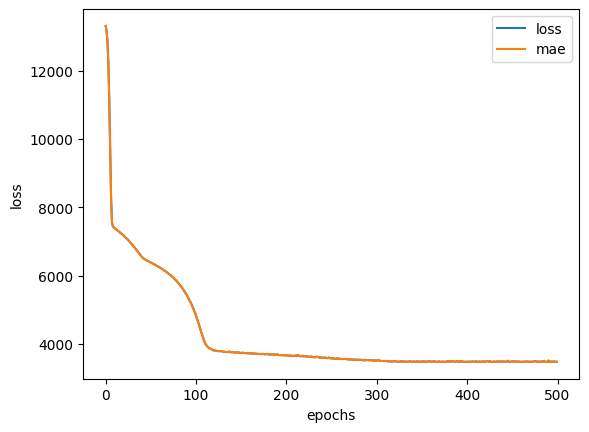

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing Data (Normalization and Standardization)

In [202]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: >

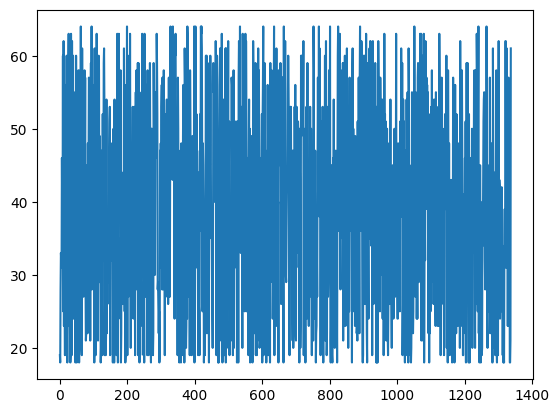

In [203]:
X["age"].plot()

<Axes: ylabel='Frequency'>

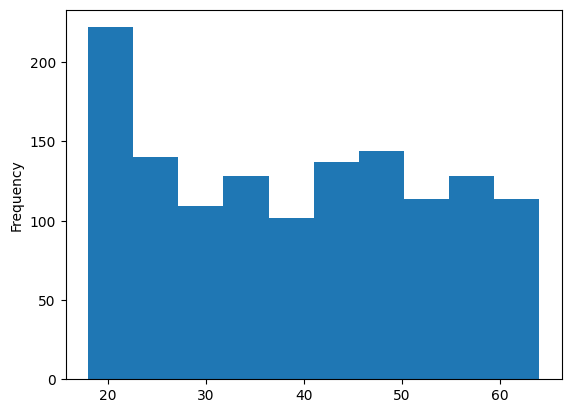

In [204]:
X["age"].plot(kind="hist")

<Axes: >

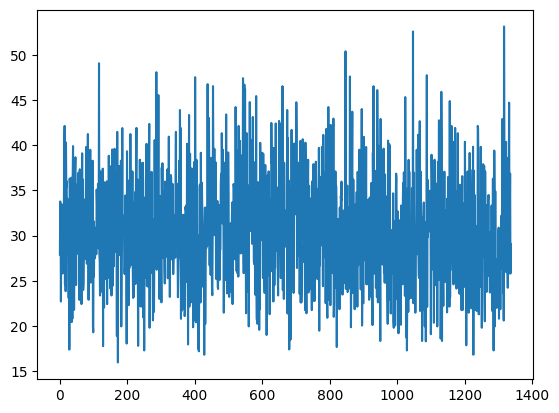

In [205]:
X["bmi"].plot()

<Axes: ylabel='Frequency'>

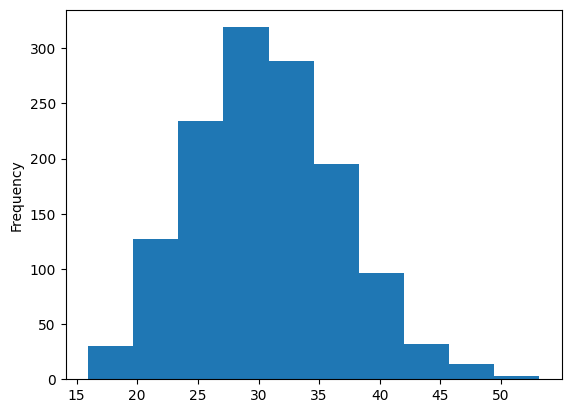

In [206]:
X["bmi"].plot(kind="hist")

In [207]:
# Use MinMaxScaler from Scikit-Learn

# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [208]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer
ct.fit(X_train)

# Transform the training and test data with normalization (MinMaxScaler) and one-hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [209]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [210]:
# Build a neural network model

# Create
model = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit
model.fit(X_train_normal, y_train, epochs=500, verbose=1)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13343.9512 - mae: 13343.9512
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13336.4023 - mae: 13336.4023
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13317.8887 - mae: 13317.8887
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13278.5830 - mae: 13278.5830
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13207.4482 - mae: 13207.4482
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 13092.8955 - mae: 13092.8955
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 12924.1191 - mae: 12924.1191
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 12690.8184 - mae: 12690.8184
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12382.6924 - mae: 12382.6924
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 11993.75

In [211]:
# Evaluate the model

model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.9014 - mae: 3160.9014


[3160.9013671875, 3160.9013671875]

In [212]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               1200      
                                                                 
 dense_40 (Dense)            (None, 10)                1010      
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
